# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data and Smoke Analysis

In [2]:
data = pd.read_csv("train.csv")

In [3]:
# Function for return columnms those having NA values
def get_na(data): 
    null_vars = data.isnull().sum()
    null_vars = null_vars[null_vars > 0]

    if(len(null_vars) > 0):
        null_vars.sort_values(inplace=True)
        return null_vars
    else:
        print("No column have NA values")

In [4]:
get_na(data)

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

# Preprocessing And EDA

In [5]:
import seaborn as sns

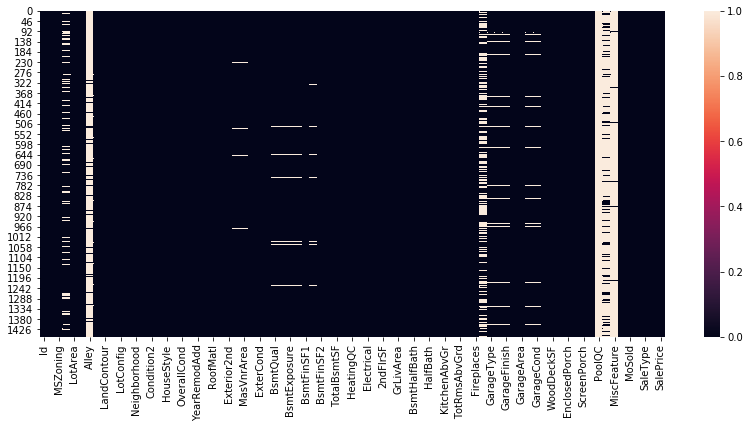

In [6]:
plt.figure(figsize = (14,6))
sns.heatmap(data.isna()) #Ploting Heatmap for missing value

In [7]:
# Remove less significant variables those having too many NA's unwanted variable like ID

print("Before Removal Shape:", data.shape)
data.drop("Id", inplace = True, axis = 1)
data.drop("Fence", inplace = True, axis = 1)
data.drop("Alley", inplace = True, axis = 1)
data.drop("MiscFeature", inplace = True, axis = 1)
data.drop("PoolQC", inplace = True, axis = 1)
print("After Removal Shape:", data.shape)

Before Removal Shape: (1460, 81)
After Removal Shape: (1460, 76)


In [8]:
# Split Data into x(Dependant variables) and y(Independant variables)
y = data.SalePrice
x = data.drop('SalePrice', axis = 1)
print("X", x.shape)
print("Y", y.shape)

X (1460, 75)
Y (1460,)


In [9]:
# Numerical Variables in Final X
num_datatypes = ['int32','int64','float64']
print("Total Numerical Variables",len(x.select_dtypes(num_datatypes).columns))
x_numerics = x.select_dtypes(num_datatypes)
x_numerics.columns

Total Numerical Variables 36


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [10]:
# Converting Variables those having numeric values but Categorical in Nature
x.MSSubClass = x.MSSubClass.astype(str)
x.OverallCond = x.OverallCond.astype(str)

# So I am dropoing this from 
x_numerics.drop('MSSubClass', inplace = True, axis = 1)
x_numerics.drop('OverallCond', inplace = True, axis = 1)

C:\Users\HP\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [11]:
# Categorical Variables
print("Total Categorical Variables",len(x.select_dtypes("O").columns))
x_categorical = x.select_dtypes("O")
x_categorical.columns

Total Categorical Variables 41


Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

<h3>Feature Engineering for Time Variables (YearBuilt,YrSold,MoSold,GarageYrBlt)</h3>

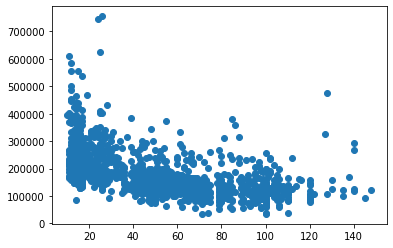

In [12]:
from datetime import datetime as t
home_age = t.now().year - x_numerics.YearBuilt              # We are defining How many years old home is
plt.scatter(home_age,y)

In [13]:
home_age =  home_age.max() - home_age
x_numerics['home_age'] = home_age
#x_numerics['home_age']

C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


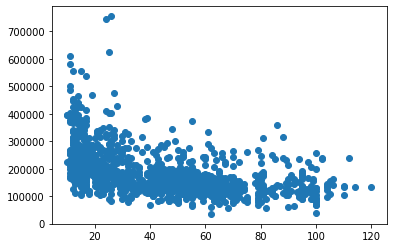

In [14]:
GarageBuild_Interval = t.now().year - x_numerics.GarageYrBlt
plt.scatter(GarageBuild_Interval,y)

In [15]:
GarageBuild_Interval =  GarageBuild_Interval.max() - GarageBuild_Interval
x_numerics['GarageBuild_Interval'] = GarageBuild_Interval
#x_numerics['GarageBuild_Interval']

C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


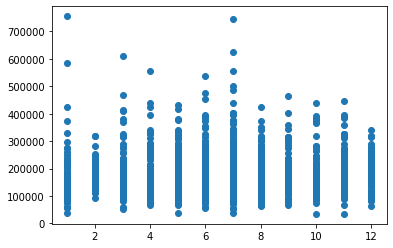

In [16]:
#x.MoSold = x.MoSold.astype(str)
plt.scatter(x_numerics.MoSold,y)

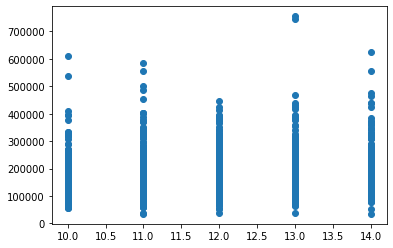

In [17]:
YrSold_Interval = t.now().year - x_numerics.YrSold
plt.scatter(YrSold_Interval,y)

In [18]:
YrSold_Interval =  YrSold_Interval.max() - YrSold_Interval
x_numerics['YrSold_Interval'] = YrSold_Interval

C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
# Here YearBuilt, YrSold and MoSold are not significant So we are dropping it.
x_numerics.drop('MoSold',axis = 1, inplace = True)
x_numerics.drop('YrSold',axis = 1,inplace = True)
x_numerics.drop('GarageYrBlt',axis = 1, inplace = True)
x_numerics.drop('YearBuilt',axis = 1,inplace = True)
x_numerics.shape

(1460, 33)

<h3>Missing Value Treatment for Numerical Variables</h3>

In [20]:
get_na(x_numerics)

MasVnrArea                8
GarageBuild_Interval     81
LotFrontage             259
dtype: int64

In [21]:
# Fillna for numerics
ndf = dict(get_na(x_numerics))
for p in ndf.keys():
    x_numerics[p].fillna(x_numerics[p].mean(), inplace = True)

C:\Users\HP\Anaconda\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


<h3>Feature Engineering for Area Variables</h3>

In [22]:
# Adding total area feature 
x_numerics['TotalSF'] = x_numerics['TotalBsmtSF'] + x_numerics['1stFlrSF'] + x_numerics['2ndFlrSF']
# Removing TotalBsmtSF,1stFlrSF, 2ndFlrSF and Id
x_numerics.drop(["TotalBsmtSF"], axis=1, inplace = True)
x_numerics.drop(["1stFlrSF"], axis=1, inplace = True)
x_numerics.drop(["2ndFlrSF"], axis=1, inplace = True)

C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
print("Final Numerical variable:",len(x_numerics.columns))
x_numerics.columns

Final Numerical variable: 31


Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'home_age',
       'GarageBuild_Interval', 'YrSold_Interval', 'TotalSF'],
      dtype='object')

In [24]:
get_na(x_numerics)

No column have NA values


<h4>Here we don't Have NA into numericals</h4>
<br/>
<h3>Skewness Treatment for numerical Variables</h3>

# Categorical Variables' Treatment

In [25]:
get_na(x_categorical)

Electrical        1
MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
BsmtExposure     38
BsmtFinType2     38
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
FireplaceQu     690
dtype: int64

In [26]:
x_categorical.drop('FireplaceQu', inplace = True, axis =1)

In [27]:
# Fillna for categorical with loop
ndf2 = dict(get_na(x_categorical))
for q in ndf2.keys():
    x_categorical[q].fillna(x_categorical[q].mode(), inplace = True)
    #print(q, x_categorical[q].isna().sum())

In [28]:
x_categorical.fillna("none", inplace = True, axis = 1)

C:\Users\HP\Anaconda\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [29]:
get_na(x_categorical)

No column have NA values


In [30]:
# Using get_dummies function
x_categorical_dummies  = pd.get_dummies(x_categorical,drop_first=True)
x_categorical_dummies.head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


<h2>Mean Normalization</h2>
<span>After Mean Normalization the data scale will change and it will not affect original data distribution</span>

In [31]:
x_numerics = ((x_numerics - x_numerics.min())/(x_numerics.max() - x_numerics.min()))
x_numerics.describe()

,LotFrontage,LotArea,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,home_age,GarageBuild_Interval,YrSold_Interval,TotalSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.167979,0.043080,0.566591,0.581096,0.064803,0.078604,0.031580,0.242826,0.010218,0.222582,...,0.085302,0.039772,0.006712,0.031377,0.003738,0.002806,0.719332,0.713692,0.453938,0.195573
std,0.075425,0.046653,0.153666,0.344090,0.112856,0.080811,0.109443,0.189155,0.085005,0.098998,...,0.121126,0.110723,0.057711,0.116161,0.054441,0.032008,0.218862,0.218133,0.332024,0.071967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.029229,0.444444,0.283333,0.000000,0.000000,0.000000,0.095462,0.000000,0.149868,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.594203,0.563636,0.250000,0.146742
50%,0.167979,0.038227,0.555556,0.733333,0.000000,0.067948,0.000000,0.204409,0.000000,0.212886,...,0.045704,0.000000,0.000000,0.000000,0.000000,0.000000,0.731884,0.713692,0.500000,0.187423
75%,0.198630,0.048150,0.666667,0.900000,0.102656,0.126196,0.000000,0.345890,0.000000,0.271807,...,0.124314,0.000000,0.000000,0.000000,0.000000,0.000000,0.927536,0.918182,0.750000,0.233841
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


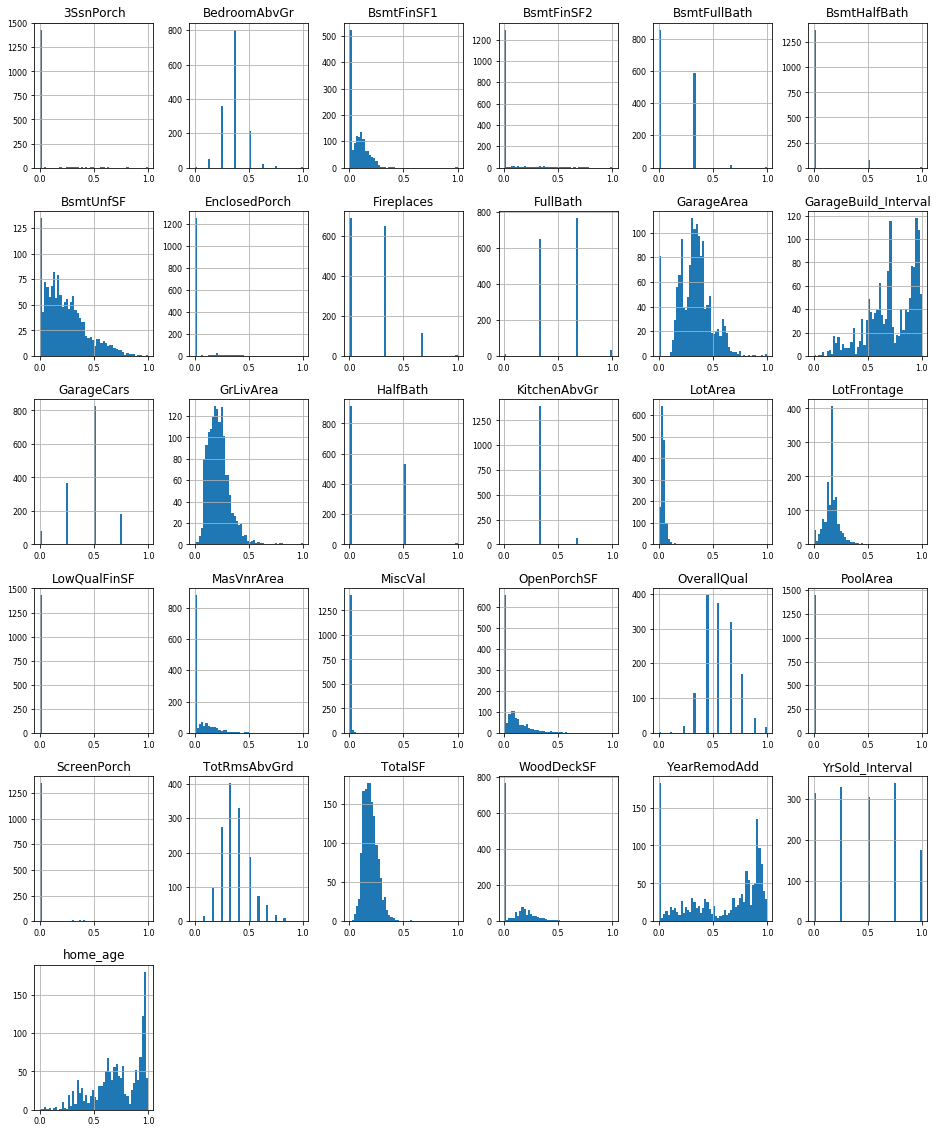

In [32]:
# Checking Skewness
x_numerics.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [33]:
from scipy.stats import skew
x_numerics_skew = x_numerics.apply(lambda x: skew(x.dropna()))
x_numerics_skew = x_numerics_skew[x_numerics_skew > .75]
x_numerics_skew

LotFrontage       2.382499
LotArea          12.195142
MasVnrArea        2.673661
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtHalfBath      4.099186
KitchenAbvGr      4.483784
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
TotalSF           1.774874
dtype: float64

In [34]:
# apply log + 1 transformation for all numeric features with skewnes over .75
x_numerics[x_numerics_skew.index] = np.log1p(x_numerics[x_numerics_skew.index])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000065CC788BE0>,
      dtype=object)

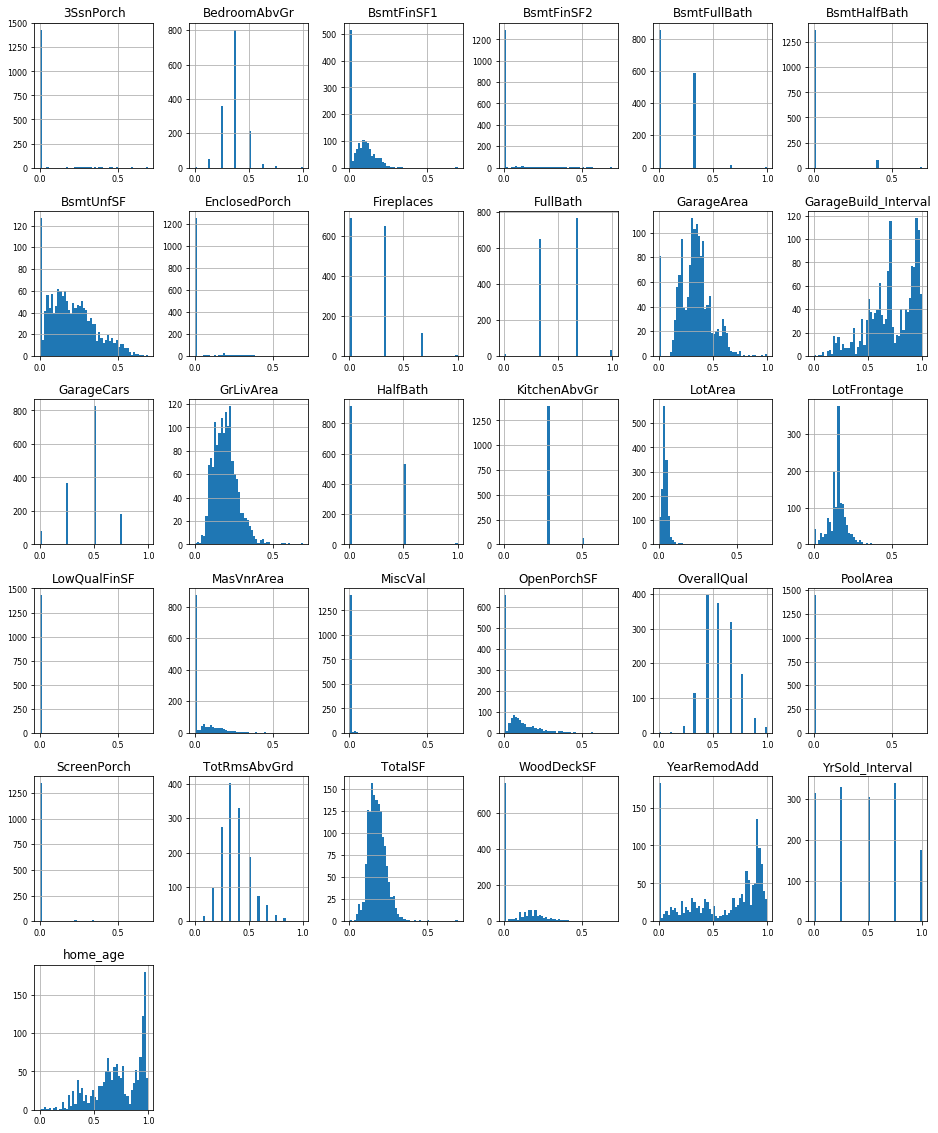

In [35]:
x_numerics.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

# Combine Categorical and Numerical Variables

In [36]:
x_final = pd.concat([x_numerics, x_categorical_dummies], axis = 1)
print("Total Columns:",len(x_final.columns))

Total Columns: 260


In [37]:
x_final.head()

,LotFrontage,LotArea,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.140357,0.032874,0.666667,0.883333,0.115558,0.117862,0.0,0.062235,0.0,0.230501,...,0,0,0,0,1,0,0,0,1,0
1,0.184032,0.038061,0.555556,0.433333,0.000000,0.159804,0.0,0.114734,0.0,0.161124,...,0,0,0,0,1,0,0,0,1,0
2,0.149246,0.045458,0.666667,0.866667,0.096446,0.082602,0.0,0.170407,0.0,0.241808,...,0,0,0,0,1,0,0,0,1,0
3,0.125365,0.037836,0.666667,0.333333,0.000000,0.037557,0.0,0.207960,0.0,0.231548,...,0,0,0,0,1,0,0,0,0,0
4,0.195364,0.058812,0.777778,0.833333,0.197826,0.109798,0.0,0.190422,0.0,0.300969,...,0,0,0,0,1,0,0,0,1,0


# Checking y (depenatamt variable) Normality

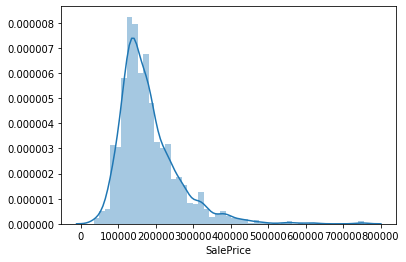

In [38]:
sns.distplot(y)

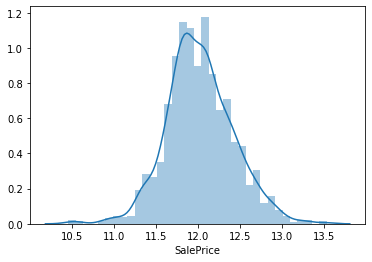

In [39]:
sns.distplot(np.log(y))

In [40]:
# Our dependant variable having non-normalize form sowe are using it as log transform for make it normalization 
y = np.log(y)

# Method for Table of evaluation

In [41]:
# This will be Final Table of evaluation.
report_rows = []

# Model Report Generation Method Linear Regression
def model_eval(Model, RSquared, Adj_RSquared, RMSE):
    row_value = [Model, RSquared, Adj_RSquared, RMSE]
    report_rows.append(row_value)
    
# Comparison of various model
def create_report():
    cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
    models_table = pd.DataFrame(report_rows , columns = cols)

#This will be Final Table
def get_report():
    create_report()
    models_table

# Model Building

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_final, y, test_size = 0.33, random_state=0)

In [44]:
# Creating Object of Linear Regression
lr = LinearRegression()
# Fitting Training dataset for training model
model1 = lr.fit(x_train, y_train)

In [45]:
# Prediction for Testing variables
predict1 = model1.predict(x_test)

## Evaluating Model

In [52]:
# Summarize the fit of the model
mse = np.mean((predict1-y_test)**2)

# Visualize original price and predicted price
mse = np.mean(((y_test - predict1)**2))

# Root means Seuared Error
rmse = np.sqrt(mse)

# Rsquare Error
#rsquare =  (np.sum(y_test - np.mean(y_test)**2)-np.sum((y_test - predict1)**2))/np.sum(y_test - np.mean(y_test)**2)
explained = np.sum((y_test - predict1)**2)
total = np.sum((y_test - np.mean(y_test))**2)
rsquare = explained / total

# Adj -Rsquare Error
adj_rsquare = 1-(np.sum((y_test - predict1)**2)/np.sum(y_test - np.mean(y_test)**2))

print("Root means Seuared Error:%f"%rmse)
print("Rsquare Error:%f"%rsquare)
print("Adj -Rsquare Error:%f"%adj_rsquare)

Root means Seuared Error:57412447758.054680
Rsquare Error:21792047503201057898496.000000
Adj -Rsquare Error:24883782102430392320.000000


In [59]:
y_test

529     12.209188
491     11.798104
459     11.608236
279     12.165251
655     11.385092
1013    11.350407
1403    12.552927
601     11.856515
1182    13.521139
687     11.910358
1317    12.249611
1003    11.827043
1300    12.323856
1392    11.719940
1014    11.688558
254     11.884489
1322    12.154779
89      11.724806
31      11.914048
482     11.951180
142     12.019743
811     11.881035
52      11.608236
857     12.066811
1159    12.128111
991     12.031719
1358    12.086726
649     11.344507
724     12.676076
575     11.682668
          ...    
1227    11.898188
530     12.072541
1399    11.831015
922     12.043495
912     11.385092
418     11.744037
906     12.449019
751     11.995352
828     12.128111
1296    11.951180
901     11.938193
1038    11.482466
716     11.979799
1069    11.813030
1226    12.273731
500     11.635143
471     12.154779
1447    12.388394
487     12.072541
1336    11.813030
1177    11.652687
131     12.404924
15      11.790557
1086    11.332602
911     11